In [1]:
import pickle
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

zall_file = '/home/dipiano/E4/irf_random/crab/irf_random_full_ds_snr.txt'
z20_file = '/home/dipiano/E4/irf_z20/crab/irf_z20_full_ds_snr.txt'

zall = pd.read_csv(zall_file, sep=' ', header=0).sort_values(by=['seed']).dropna()
z20 = pd.read_csv(z20_file, sep=' ', header=0).sort_values(by=['seed']).dropna()  

len(zall), len(z20)

(8082, 7961)

In [2]:
zall.head()

,seed,loc_ra,loc_dec,counts_on,counts_off,excess,excess_err,sigma,snr
2,3,76.894712,-66.343824,145.0,617.0,93.583333,27.604347,10.048215,3.510678
3,4,125.480814,-44.467154,189.0,708.0,138.428571,29.949958,14.058160,4.758067
4,5,214.105104,42.757503,161.0,771.0,118.166667,30.528675,13.177265,3.962811
5,6,352.536952,43.604779,89.0,110.0,67.000000,14.106736,9.240755,5.036028
6,7,42.802217,86.979388,164.0,101.0,138.750000,16.278821,14.856795,8.960942


In [3]:
z20.head()

,seed,loc_ra,loc_dec,counts_on,counts_off,excess,excess_err,sigma,snr
0,1,316.619078,12.616735,493.0,192.0,301.000000,26.172505,11.699919,13.556358
1,2,16.523037,78.046384,392.0,850.0,179.500000,35.242020,9.607832,5.594371
2,3,340.484204,-17.460856,492.0,340.0,322.000000,28.844410,15.207882,12.514885
3,4,344.170518,86.466960,175.0,2763.0,72.666667,54.203321,6.374312,1.364607
4,5,214.891906,34.429314,201.0,2763.0,80.869565,54.442630,6.552376,1.516458


In [13]:
import matplotlib.patches as mpatches

colors = #['orange', 'navy']
labels = #['20° zenith', 'random zenith']
hatches = #['\\', '//']
histsize = (8,8)
fs = 16
nbins = 50
legends = [mpatches.Patch(facecolor='none', edgecolor=colors[0], hatch=hatches[0]), 
           mpatches.Patch(facecolor='none', edgecolor=colors[1], hatch=hatches[1])]

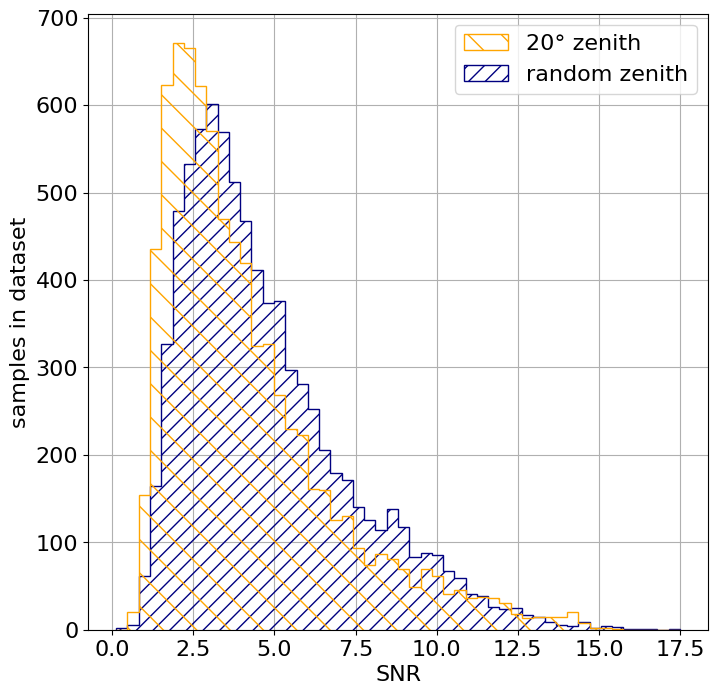

In [14]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr'], zall['snr'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr_z20_zALL.png')

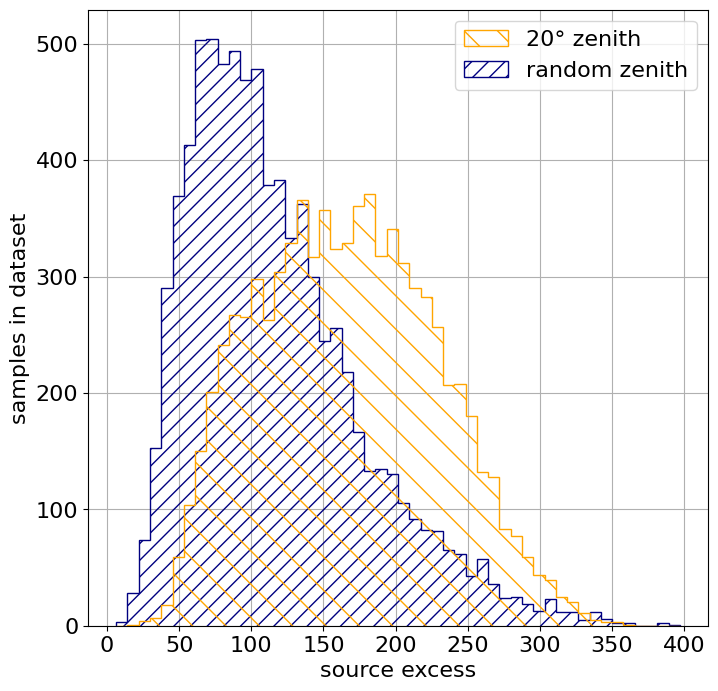

In [21]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['excess'], zall['excess'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('source excess', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_excess_z20_zALL.png')

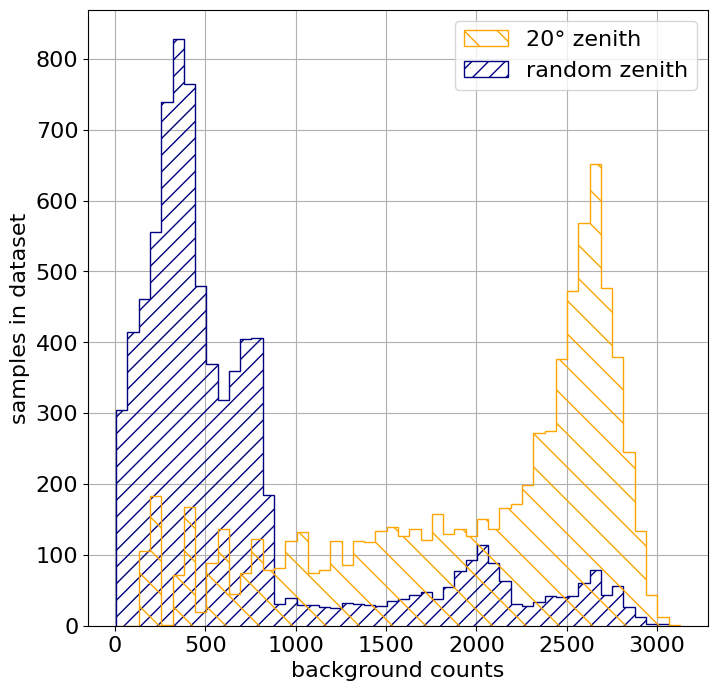

In [22]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['counts_off'], zall['counts_off'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('background counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_offcounts_z20_zALL.png')

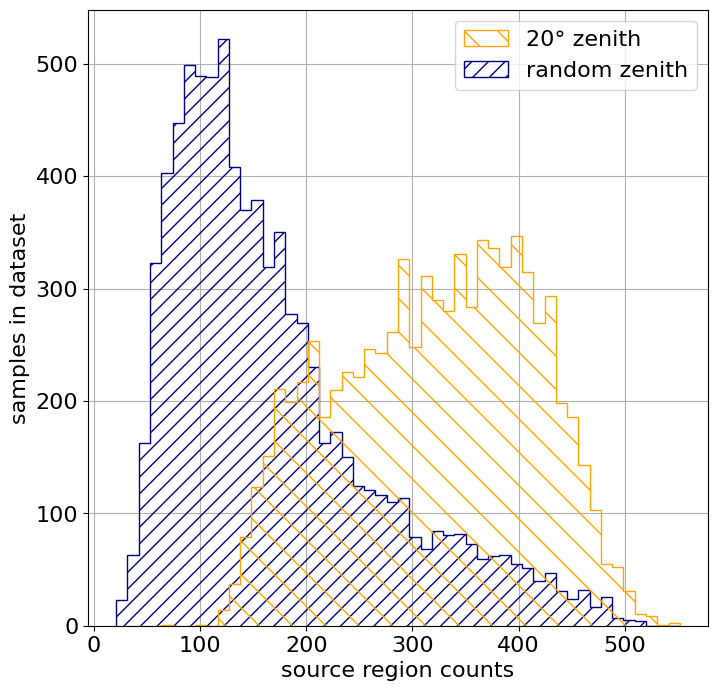

In [23]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['counts_on'], zall['counts_on'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('source region counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_oncounts_z20_zALL.png')

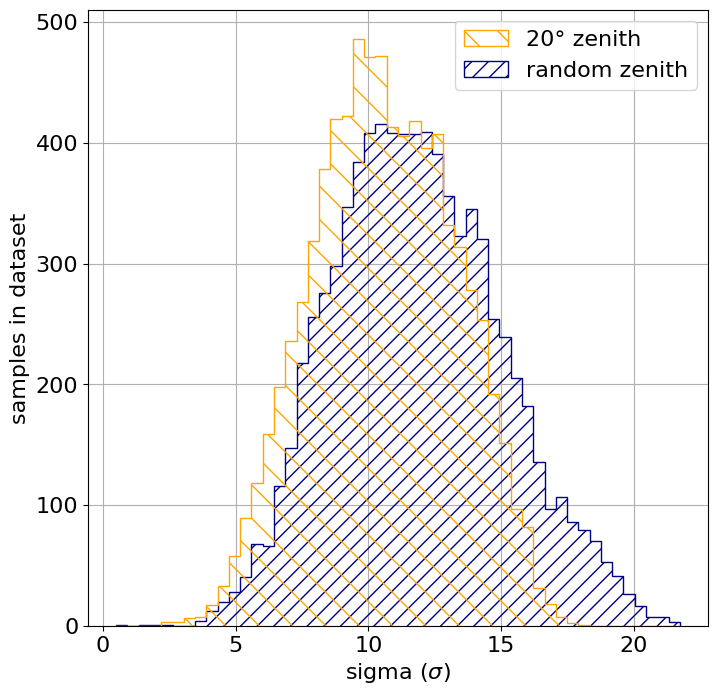

In [24]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['sigma'], zall['sigma'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(r'sigma ($\sigma$)', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_sigma_z20_zALL.png')

In [25]:
import pickle
import scipy
import numpy as np
import pandas as pd
from scipy import stats

dg = 'data/loc_gammapy_zALL.pickle'
dm = 'data/loc_cnn_zALL.pickle'

with open(dg,'rb') as f: dsg = np.array(pickle.load(f))
with open(dm,'rb') as f: dsm = np.array(pickle.load(f)[:2000])
    
len(dsg), len(dsm)

(2000, 2000)